In [14]:
import seaborn
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [3]:
# Load the data
transactions = pd.read_csv('transactions.csv')

In [4]:
# Summary statistics on amount column
print(transactions['amount'].describe())
print(transactions.head())
print(transactions.info())

count    1.999990e+05
mean     1.802425e+05
std      6.255482e+05
min      0.000000e+00
25%      1.338746e+04
50%      7.426695e+04
75%      2.086376e+05
max      5.204280e+07
Name: amount, dtype: float64
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  CASH_OUT  158007.12   C424875646           0.00            0.00   
1   236  CASH_OUT  457948.30  C1342616552           0.00            0.00   
2    37   CASH_IN  153602.99   C900876541    11160428.67     11314031.67   
3   331  CASH_OUT   49555.14   C177696810       10865.00            0.00   
4   250  CASH_OUT   29648.02   C788941490           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C1298177219       474016.32      1618631.97        0  
1  C1323169990      2720411.37      3178359.67        0  
2   C608741097      3274930.56      3121327.56        0  
3   C462716348            0.00        49555.14        0  
4  C1971700992        56933.09        86581.10  

In [5]:
# Create isPayment field
transactions['isPayment'] = 0
transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1

# Create isMovement field
transactions['isMovement'] = 0
transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1.0

# Create accountDiff field
transactions['accountDiff'] = abs(transactions['oldbalanceOrg'] - transactions['oldbalanceDest'])

# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
labels = transactions[['isFraud']]

/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_21576/2682292587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1
/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_21576/2682292587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1


In [6]:
# Warning above is no problem (for now...)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size=0.2, random_state = 100)

In [7]:
# Normalize the features variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print(X_train.shape)
print(y_train.shape)

(159999, 4)
(159999, 1)


### Trying a Decision Tree to classify fraudulent transactions


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

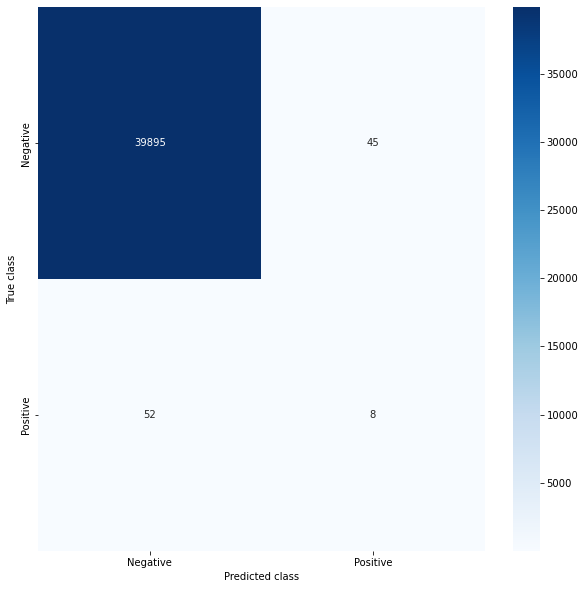

In [38]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predictions = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
class_names = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = seaborn.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

### Trying a Random Forest Classifier

/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_21576/4147315830.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39940
           1       0.33      0.05      0.09        60

    accuracy                           1.00     40000
   macro avg       0.67      0.52      0.54     40000
weighted avg       1.00      1.00      1.00     40000



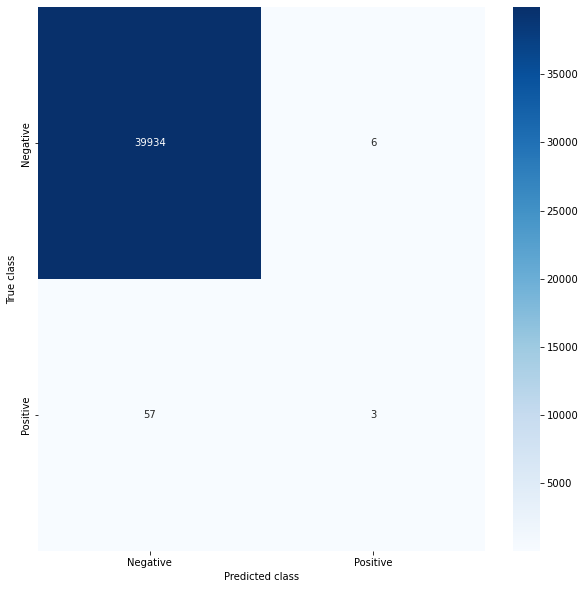

In [19]:
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
class_names = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = seaborn.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
print(classification_report(y_test, rf_predictions))

In [24]:
label_counts = transactions['isFraud'].value_counts()
non_fraud = label_counts[0]
fraud = label_counts[1]
print(f"Non Fraudulent Numbers :- {non_fraud}")
print(f"Fraudulent Numbers :- {fraud}")

Non Fraudulent Numbers :- 199717
Fraudulent Numbers :- 282


In [30]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(sampling_strategy='minority', random_state=100)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     39940
           1       0.03      0.67      0.06        60

    accuracy                           0.97     40000
   macro avg       0.52      0.82      0.52     40000
weighted avg       1.00      0.97      0.98     40000



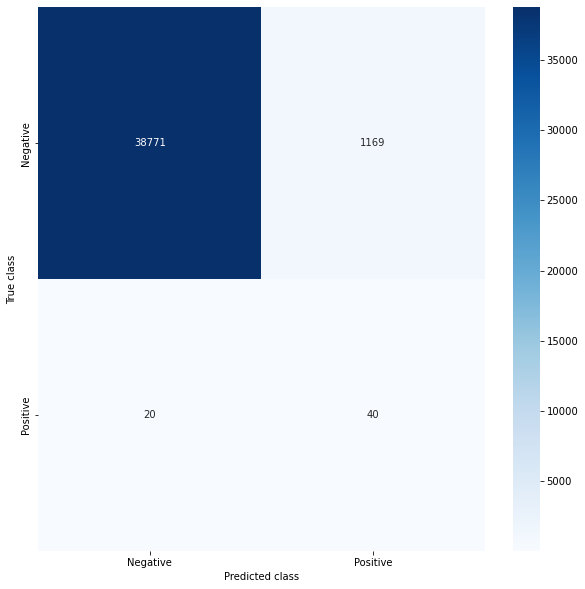

In [36]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_over, y_train_over)
dt_predictions = dt_clf.predict(X_test)
cm = confusion_matrix(y_test, dt_predictions)
class_names = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = seaborn.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
print(classification_report(y_test, dt_predictions))

/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_21576/1129792465.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train_over, y_train_over)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     39940
           1       0.03      0.68      0.06        60

    accuracy                           0.97     40000
   macro avg       0.52      0.83      0.52     40000
weighted avg       1.00      0.97      0.98     40000



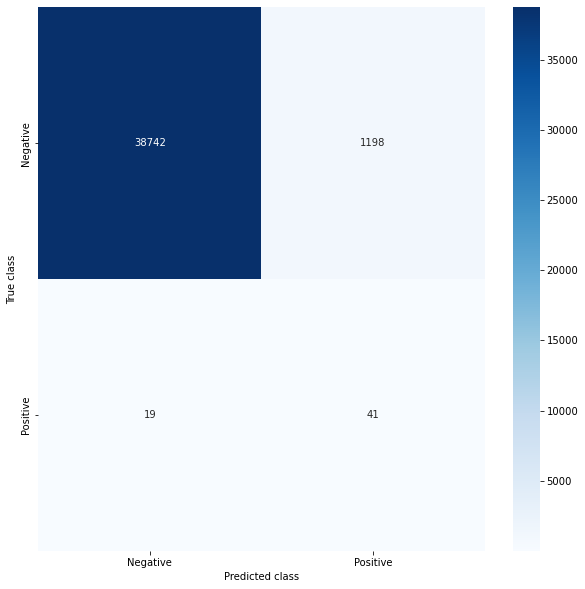

In [37]:
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train_over, y_train_over)
rf_predictions = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
class_names = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = seaborn.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
print(classification_report(y_test, rf_predictions))